# Julia Introduction - Live Session

Tamas Gal <tamas.gal@fau.de>

In [2]:
versioninfo()

Julia Version 1.6.1
Commit 6aaedecc44 (2021-04-23 05:59 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Apple M1
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, westmere)
Environment:
  JULIA_EDITOR = emacsclient -nw


In [3]:
using BenchmarkTools

In [6]:
function f(x)
    return 2*x
end

f (generic function with 1 method)

In [7]:
f(1)

2

In [8]:
f(123.44)

246.88

In [ ]:
%timeit  # in ipython

In [9]:
@btime f(2)

  0.001 ns (0 allocations: 0 bytes)


4

In [10]:
x = 2

2

In [11]:
@btime f($(Ref(x))[])  # trick the compiler for such femto-benchmarks

  1.500 ns (0 allocations: 0 bytes)


4

In [12]:
β = 23

23

In [13]:
β₁⁺ = 123  # beta_one_plus

123

In [14]:
slowmean(arr) = sum(arr) / length(arr) 

slowmean (generic function with 1 method)

In [15]:
f(x) = 2x

f (generic function with 1 method)

In [16]:
x = rand(10000)

10000-element Vector{Float64}:
 0.21258757670163564
 0.8871097204634375
 0.24678399009997865
 0.30969935443802954
 0.8071851021459258
 0.6645902354526816
 0.7935483441444235
 0.14443568872058465
 0.5839047176601535
 0.1398828566306598
 0.3501374969118385
 0.5205954406577717
 0.7515824261879467
 ⋮
 0.39146574872138906
 0.48263044006878375
 0.36087585225815744
 0.38695973950788964
 0.9569344986181942
 0.33287704902970217
 0.47561211656846925
 0.5828322101028716
 0.6534511307824213
 0.015357092630671199
 0.3902516654149799
 0.47007030998296817

In [17]:
typeof(x)

Vector{Float64} (alias for Array{Float64, 1})

In [18]:
@btime slowmean($x)

  1.837 μs (0 allocations: 0 bytes)


0.4983345945133995

In [19]:
@btime mean($x)

  1.829 μs (0 allocations: 0 bytes)


0.4983345945133995

### Multiple Dispatch

In [21]:
?rand

search: rand randn transcode macroexpand @macroexpand @macroexpand1



```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and `BitSet`. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.



In [22]:
methods(rand)

# 70 methods for generic function "rand":
[1] rand() in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/Random.jl:256
[2] rand(dims::Integer...) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/Random.jl:277
[3] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{var"#s832", var"#s831", E} where {var"#s832"<:AbstractArray, var"#s831"<:Random.Sampler, E}) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:398
[4] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{var"#s832", var"#s831", E} where {var"#s832"<:Dict, var"#s831"<:Random.Sampler, E}) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:411
[5] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{BitSet, var"#s832", E} where {var"#s832"<:Random.Sampler, E}) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:432
[6] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{var"#s832", var"#s831", E} where {var"#s832"<:AbstractString, var"#s831"<:Random.Sampler, E}) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:479
[7] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{Tuple{A, B}, S, E} where {S, E}) where {A, B} in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:503
[8] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{Tuple{A, B, C}, S, E} where {S, E}) where {A, B, C} in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:511
[9] rand(rng::Random.AbstractRNG, sp::Random.SamplerSimple{T, S, E} where {S, E}) where T<:Tuple in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:531
[10] rand(rng::Random.AbstractRNG, ::Random.UniformT{T}) where T in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/Random.jl:242
[11] rand(rng::Random.AbstractRNG, sp::Random.LessThan) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/Random.jl:222
[12] rand(rng::Random.AbstractRNG, sp::Random.SamplerRangeFast{UInt32, T}) where T in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:220
[13] rand(rng::Random.AbstractRNG, sp::Random.SamplerRangeFast{UInt64, T}) where T in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:227
[14] rand(rng::Random.AbstractRNG, sp::Random.SamplerRangeFast{UInt128, T}) where T in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:234
[15] rand(r::Random.AbstractRNG, ::Random.SamplerType{Complex{T}}) where T<:Real in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:159
[16] rand(r::Random.AbstractRNG, ::Random.SamplerType{T}) where T<:AbstractChar in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:165
[17] rand(rng::Random.AbstractRNG, sp::Random.Masked) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/Random.jl:234
[18] rand(rng::Random.AbstractRNG, sp::Random.SamplerTag{var"#s832", var"#s831", E} where {var"#s832"<:Set, var"#s831"<:Random.Sampler, E}) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/generation.jl:423
[19] rand(rng::Random.AbstractRNG, X::Tuple{Vararg{Int64, N}} where N) in Random at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Random/src/Random.jl:255
[20]

In [23]:
rand(Int32, 10)

10-element Vector{Int32}:
   756475614
  -776324725
  -481633355
  -194653048
  -192174130
   751301855
  -458353786
 -1441579354
   244532317
  -186881177

In [24]:
rand(Float64, 10)

10-element Vector{Float64}:
 0.7766266605131087
 0.7011714434827836
 0.6566022541588785
 0.9019051828038676
 0.8189659463773575
 0.7913626869823882
 0.0216645955998378
 0.05072898020383709
 0.3645642122604287
 0.1644975351243183

In [25]:
rand(Int32, (2, 2))

2×2 Matrix{Int32}:
 1914193570  -1540091272
 1521000586   1695335745

### Methods?

In [26]:
f(x) = 2x

f (generic function with 1 method)

In [27]:
@code_llvm f(23)

;  @ In[26]:1 within `f'
define i64 @julia_f_2741(i64 signext %0) {
top:
; ┌ @ int.jl:88 within `*'
   %1 = shl i64 %0, 1
; └
  ret i64 %1
}


In [28]:
@code_llvm f(23.5)

;  @ In[26]:1 within `f'
define double @julia_f_2767(double %0) {
top:
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %1 = fmul double %0, 2.000000e+00
; └
  ret double %1
}


In [29]:
slowmean(x) = sum(x) / length(x)

slowmean (generic function with 1 method)

In [31]:
arr = rand(Int16, 100);

In [32]:
@time slowmean(arr)

  0.030763 seconds (85.51 k allocations: 4.940 MiB, 99.44% compilation time)


832.33

In [33]:
@time slowmean(arr)

  0.000008 seconds (1 allocation: 16 bytes)


832.33

In [34]:
@time slowmean(arr)

  0.000005 seconds (1 allocation: 16 bytes)


832.33

In [35]:
arr2 = rand(Int64, 100);

In [37]:
@time slowmean(arr2)

  0.013640 seconds (3.45 k allocations: 183.449 KiB, 98.64% compilation time)


-1.207473953300515e16

In [38]:
@time slowmean(arr2)

  0.000010 seconds (1 allocation: 16 bytes)


-1.207473953300515e16

## Tiny temperature library

Inspired by Erik Engheim

Read the original blog post by Erik Engheim here: https://erik-engheim.medium.com/defining-custom-units-in-julia-and-python-513c34a4c971

In [39]:
struct Celsius
    value
end

In [40]:
Celsius(10)

Celsius(10)

In [43]:
t = Celsius(10)

Celsius(10)

In [45]:
typeof(t.value)

Int64

In [47]:
t₂ = Celsius(23.5)

Celsius(23.5)

In [49]:
typeof(t₂.value)

Float64

In [50]:
Celsius("hello")

Celsius("hello")

In [1]:
struct Celsius{T<:Real}
    value::T
end

In [2]:
Celsius(10)

Celsius{Int64}(10)

In [3]:
Celsius(5.4)

Celsius{Float64}(5.4)

In [4]:
Celsius("hello")

LoadError: MethodError: no method matching Celsius(::String)
[0mClosest candidates are:
[0m  Celsius([91m::T[39m) where T<:Real at In[1]:2

In [5]:
Celsius(5 + 10im)

LoadError: MethodError: no method matching Celsius(::Complex{Int64})
[0mClosest candidates are:
[0m  Celsius([91m::T[39m) where T<:Real at In[1]:2

In [6]:
Complex{Int64} <: Real

false

In [1]:
abstract type Temperature end

In [2]:
struct Celsius <: Temperature
    value::Float64
end

In [3]:
struct Kelvin <: Temperature
    value::Float64
end

In [5]:
import Base: convert

In [7]:
convert(::Type{Kelvin}, t::Celsius) = Kelvin(t.value + 273.15)
convert(::Type{Celsius}, t::Kelvin) = Celsius(t.value - 273.15)

convert (generic function with 189 methods)

In [ ]:
# Python example...
class Celsius:
    def __init__(self, value):
        self.value = value

    def to_kelvin(self):
        ...

In [8]:
import Base: *

In [9]:
*

* (generic function with 328 methods)

In [10]:
*(x::Number, y::T) where {T <: Temperature} = T(x * y.value);

In [12]:
10Kelvin(10)

Kelvin(100.0)

In [17]:
const °C = Celsius(1)
const K = Kelvin(1)

1.0 K

In [13]:
Kelvin(10)

Kelvin(10.0)

In [14]:
import Base: show
show(io::IO, t::Celsius) = print(io, "$(t.value) °C")
show(io::IO, t::Kelvin) = print(io, "$(t.value) K")

show (generic function with 257 methods)

In [15]:
Celsius(23.5)

23.5 °C

In [18]:
convert(Kelvin, 36°C)

309.15 K

### Random temperatures?

In [19]:
rand()

0.04572757192280141

In [20]:
rand(Int32)

1910831644

In [21]:
using Random

In [26]:
Random.rand(rng::AbstractRNG, ::Random.SamplerType{Kelvin}) = Kelvin(rand())

In [27]:
rand(Kelvin)

0.29931148837148225 K

In [29]:
rand(Kelvin, 100, 100)

100×100 Matrix{Kelvin}:
 0.7166055641529143 K    0.062047265945729846 K  …  0.7907739675149648 K
 0.4486062678320071 K    0.8868163186078697 K       0.6559046356001139 K
 0.14408860303284432 K   0.5551208722439058 K       0.9472317322065356 K
 0.8623844254467885 K    0.298714328555014 K        0.23851394321598662 K
 0.6104824418405042 K    0.7216254974468121 K       0.7478808217634498 K
 0.35201459805156654 K   0.28015508672223133 K   …  0.16244678773901833 K
 0.046517372951268676 K  0.4593328580659566 K       0.2651785344743045 K
 0.5478507088779361 K    0.9044897234238174 K       0.40641836996378466 K
 0.6472558218446516 K    0.5019562475248476 K       0.21544514634678125 K
 0.055518339051443766 K  0.35557748255123034 K      0.18531419239656222 K
 0.8244840996507072 K    0.08089720798442901 K   …  0.4679345326910971 K
 0.7332685937715724 K    0.10599961731536389 K      0.37789083612629715 K
 0.7505914585011357 K    0.14948227210123766 K      0.7775012052805184 K
 ⋮                   

In [30]:
using BenchmarkTools

In [31]:
@btime rand(Kelvin, 1000, 1000)

  3.721 ms (2 allocations: 7.63 MiB)


1000×1000 Matrix{Kelvin}:
 0.010927394499722132 K  0.3134106143526172 K    …  0.05292425504102294 K
 0.9411248522843292 K    0.4900094639311108 K       0.3190431886539189 K
 0.7785926608082536 K    0.23575162028532093 K      0.30747454094662663 K
 0.5643459987334154 K    0.13986884901729835 K      0.9033866911874655 K
 0.2614721681307668 K    0.33556086558364284 K      0.8632205795469408 K
 0.3716472121324552 K    0.617721573790204 K     …  0.04927600576748925 K
 0.3495121720914838 K    0.7503673207505956 K       0.8853709085734691 K
 0.2848098487274697 K    0.2719419853055578 K       0.2099358094042738 K
 0.7086361857545505 K    0.951649846517485 K        0.6127611949584475 K
 0.7991704801126653 K    0.9878984120852266 K       0.3557107077405146 K
 0.46182032788505323 K   0.059317830491813384 K  …  0.8812606607010474 K
 0.6809710657814392 K    0.17879553280748262 K      0.9830132916385828 K
 0.1790446327580708 K    0.3664745793074826 K       0.7149226183883208 K
 ⋮                    

In [32]:
@btime 2 * rand(Kelvin, 100, 100)

  38.709 μs (4 allocations: 156.41 KiB)


100×100 Matrix{Kelvin}:
 1.7362810121612084 K   0.26927866861204564 K  …  1.7950647447716657 K
 1.429334444369788 K    1.2839463225990588 K      0.8582360382251455 K
 0.562976636796682 K    0.5007480637916029 K      1.0866172214726735 K
 0.3673180323652967 K   1.9311321259310272 K      0.06411885347878243 K
 0.6067950870804157 K   0.4737392641989131 K      1.1775427642563567 K
 0.08350595624808888 K  0.43663475803044793 K  …  0.27788375949634503 K
 0.6280446740731294 K   1.88405905683233 K        0.44829628760749385 K
 1.0316926305495198 K   0.2926749687894765 K      0.6206366618553467 K
 1.58156945690529 K     0.44090781995437967 K     1.3041519406850184 K
 1.1358304858932886 K   1.071359745235176 K       1.6428446905546106 K
 0.2691150374328979 K   1.5265747774439578 K   …  1.9808585738425286 K
 1.6857339931181112 K   0.07333488054728887 K     0.5794299428685941 K
 1.2761714602613439 K   0.6744726923104984 K      0.1227883266343408 K
 ⋮                                             ⋱  

In [33]:
struct DAQHit
    dom_id::UInt32
    pmt_id::UInt8
    tot::UInt8
    time::Float64
end

In [34]:
import StatsBase: sample

In [36]:
function Random.rand(rng::AbstractRNG, ::Random.SamplerType{DAQHit})
    dom_id = sample([808123456, 809321654, 808765983, 809233667])
    pmt_id = rand(0:30)
    tot = rand(0:255)
    time = rand() * 1e6
    DAQHit(dom_id, pmt_id, tot, time)
end

In [37]:
rand(DAQHit)

DAQHit(0x303d44b6, 0x18, 0x8e, 694947.2033514938)

In [38]:
rand(DAQHit, 100)

100-element Vector{DAQHit}:
 DAQHit(0x302afc40, 0x05, 0x7f, 969399.3429786933)
 DAQHit(0x3034ca1f, 0x19, 0xa3, 594843.3182884052)
 DAQHit(0x303bed03, 0x13, 0xa4, 103175.67615491497)
 DAQHit(0x302afc40, 0x1e, 0xdd, 716435.8756371152)
 DAQHit(0x303bed03, 0x00, 0x54, 201869.22759825166)
 DAQHit(0x3034ca1f, 0x0d, 0x79, 574731.4090552957)
 DAQHit(0x303bed03, 0x05, 0x2b, 439890.5314304435)
 DAQHit(0x3034ca1f, 0x0c, 0xed, 355279.2567617096)
 DAQHit(0x303d44b6, 0x19, 0x3d, 98942.6292074702)
 DAQHit(0x302afc40, 0x11, 0x0a, 873734.4760333687)
 DAQHit(0x302afc40, 0x14, 0xb9, 151623.2432850937)
 DAQHit(0x303bed03, 0x18, 0xf4, 179873.88275197212)
 DAQHit(0x302afc40, 0x0f, 0x63, 340654.3593984197)
 ⋮
 DAQHit(0x302afc40, 0x18, 0xae, 47094.716354926015)
 DAQHit(0x3034ca1f, 0x15, 0x09, 948760.9204409916)
 DAQHit(0x303d44b6, 0x02, 0xbb, 212622.07926206588)
 DAQHit(0x302afc40, 0x12, 0x5c, 148827.26086976318)
 DAQHit(0x302afc40, 0x1b, 0xb4, 921495.892201782)
 DAQHit(0x3034ca1f, 0x10, 0xb8, 793642.76365212

### Plotting

In [39]:
using Plots

In [40]:
n = 100

100

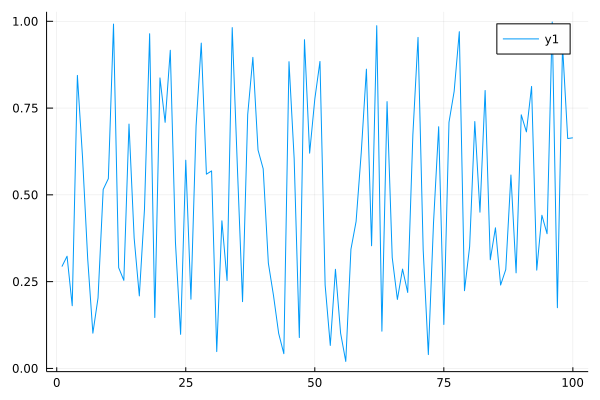

In [43]:
plot(1:100, rand(n))

In [44]:
1:100

1:100

In [50]:
collect(range(0, 10; step=2))

6-element Vector{Int64}:
  0
  2
  4
  6
  8
 10

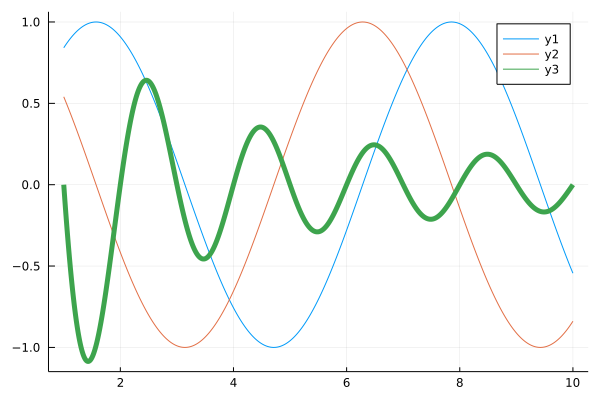

In [51]:
xs = range(1, 10, length=1000)
plot(xs, sin.(xs))
plot!(xs, cos.(xs))
plot!(xs, 5sinc.(xs), linewidth=5)

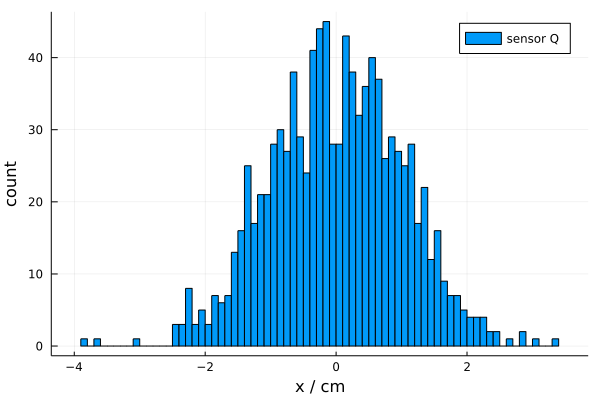

In [53]:
histogram(randn(1000), bins=100, label="sensor Q", xlabel="x / cm", ylabel="count")

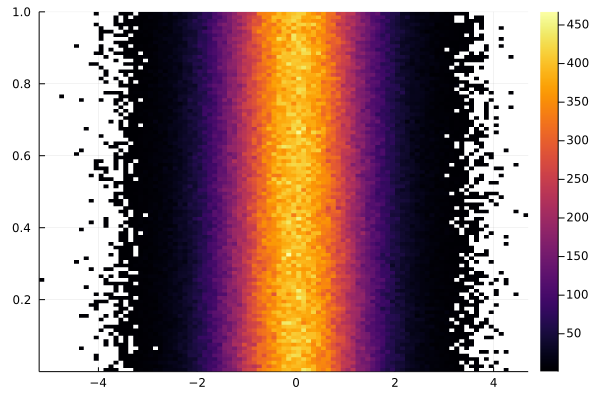

In [54]:
histogram2d(randn(1_000_000), rand(1_000_000), bins=100)

### Apropos Python

In [55]:
using PyCall

In [56]:
np = pyimport("numpy")

PyObject <module 'numpy' from '/Users/tamasgal/.julia/conda/3/lib/python3.8/site-packages/numpy/__init__.py'>

In [57]:
np.eye(5)

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [58]:
np.eye(5) * rand(5, 5)

5×5 Matrix{Float64}:
 0.452819  0.338439  0.279623  0.590659   0.0399787
 0.943147  0.688968  0.445881  0.132281   0.750715
 0.338322  0.369422  0.157111  0.0352246  0.653881
 0.125735  0.518431  0.096495  0.372935   0.943208
 0.564555  0.897389  0.298043  0.103134   0.739031

In [59]:
np.linspace(0, 10, 100)

100-element Vector{Float64}:
  0.0
  0.10101010101010101
  0.20202020202020202
  0.30303030303030304
  0.40404040404040403
  0.5050505050505051
  0.6060606060606061
  0.7070707070707071
  0.8080808080808081
  0.9090909090909091
  1.0101010101010102
  1.1111111111111112
  1.2121212121212122
  ⋮
  8.88888888888889
  8.98989898989899
  9.09090909090909
  9.191919191919192
  9.292929292929292
  9.393939393939394
  9.494949494949495
  9.595959595959595
  9.696969696969697
  9.797979797979798
  9.8989898989899
 10.0

In [1]:
using PyPlot

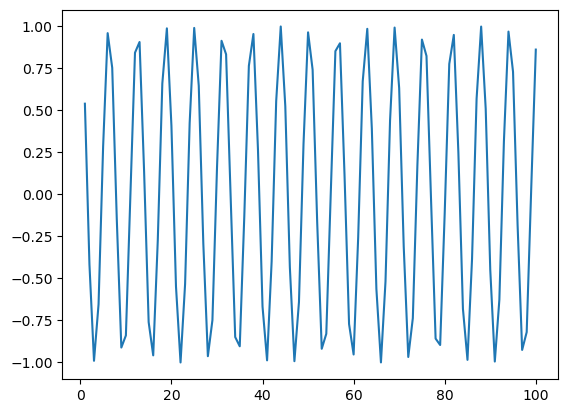

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff251c458e0>

In [4]:
xs = 1:100
plot(xs, cos.(xs))